# 6주 2강: Probability Mass Function, Cumulative Distribution Function

Allen B. Downey의 http://thinkstats2.com 코드를 참조했습니다.

이번 강의는 Probability Mass Function과 Cumulative Distribution이 무엇인지 배워보겠습니다.

## Probability Mass Function

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

항상 하던 것 처럼 preg 데이터를 불러옵시다

In [2]:
preg = pd.read_csv("./2002FemPreg.tsv", sep = "\t")
live = preg[preg.outcome == 1]

지난주에 했던 것 처럼 탄생 시의 파운드 무게 (birthwgt_lb) 를 hisogram으로 그려봅시다. 

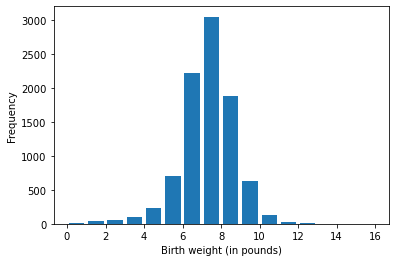

In [3]:
plt.hist(live["birthwgt_lb"], rwidth=0.8, label="birthwgt_lb",
                bins=range(int(live["birthwgt_lb"].min()), int(live["birthwgt_lb"].max()+2)))
plt.xlabel("Birth weight (in pounds)")
plt.ylabel("Frequency")
plt.show()
plt.close()

histogram의 각 성분을 가진 dictionary를 만들어 봅시다

In [4]:
hist = {key: val for key, val in enumerate(np.bincount(live["birthwgt_lb"].dropna()))}
hist

{0: 8,
 1: 40,
 2: 53,
 3: 98,
 4: 229,
 5: 697,
 6: 2223,
 7: 3049,
 8: 1889,
 9: 623,
 10: 132,
 11: 26,
 12: 10,
 13: 3,
 14: 3,
 15: 1}

pmf를 그리기 위해선 이 각 값을 전체 카운트로 나누어 normalize 해 주어야 합니다.

In [5]:
n = sum(hist.values())
pmf = hist.copy()
for x, freq in hist.items():
    pmf[x] = freq / n

pmf를 구했습니다.

In [6]:
pmf

{0: 0.0008806693086745927,
 1: 0.004403346543372964,
 2: 0.005834434169969176,
 3: 0.01078819903126376,
 4: 0.025209158960810215,
 5: 0.07672831351827389,
 6: 0.24471598414795245,
 7: 0.3356450902686041,
 8: 0.2079480405107882,
 9: 0.06858212241303391,
 10: 0.01453104359313078,
 11: 0.0028621752531924264,
 12: 0.001100836635843241,
 13: 0.00033025099075297226,
 14: 0.00033025099075297226,
 15: 0.00011008366358432408}

PMF를 그려봅시다

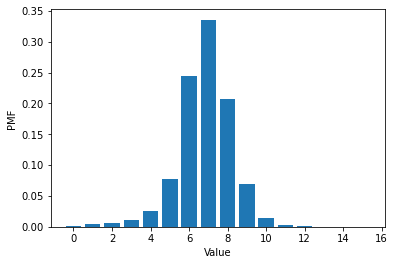

In [7]:
plt.bar(pmf.keys(), pmf.values())
plt.xlabel("Value")
plt.ylabel("PMF")
plt.show()
plt.close()

조금 더 단순한 값들의 PMF를 만들어 봅시다

In [8]:
values = [1, 2, 2, 3, 5]
pmf = {key: val/len(values) for key, val in enumerate(np.bincount(values)) if val != 0}
pmf

{1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2}

In [9]:
pmf[2]

0.4

확률 값을 직접 바꿔 봅시다. Dictionary이므로 그냥 바꾸면 됩니다. 

In [10]:
pmf[2] += 0.2
pmf

{1: 0.2, 2: 0.6000000000000001, 3: 0.2, 5: 0.2}

문제는 이렇게 되면 pmf의 조건에 맞지 않습니다. pmf는 확률값의 합이 1이 되어야 하지요.
다시 normalize 해 줍시다

In [11]:
tot = sum(pmf.values())
pmf = {key: val/tot for key, val in pmf.items()}
pmf

{1: 0.16666666666666669,
 2: 0.5000000000000001,
 3: 0.16666666666666669,
 5: 0.16666666666666669}

더하기 뿐 아니라 곱하기도 가능합니다. 
하지만 normalize를 해 주는 것을 잊어서는 안됩니다.

In [12]:
pmf[2] *= 2
tot = sum(pmf.values())
pmf = {key: val/tot for key, val in pmf.items()}
pmf

{1: 0.11111111111111109,
 2: 0.6666666666666666,
 3: 0.11111111111111109,
 5: 0.11111111111111109}

In [13]:
sum(pmf.values())

0.9999999999999998

live에 대해서 임신 기간에 대한 PMF를 그려봅시다

In [14]:
pmf = {key: val/len(live["prglngth"].dropna()) for key, val in enumerate(np.bincount(live["prglngth"].dropna()))}

당연히 Bar 형태로 그릴 수 있습니다.

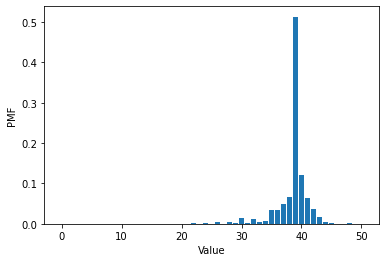

In [15]:
plt.bar(pmf.keys(), pmf.values())
plt.xlabel("Value")
plt.ylabel("PMF")
plt.show()
plt.close()

step function 형태로 그려봅시다. 이런 형태로 그리는 것은 두 가지의 값을 비교하는데 유용합니다.

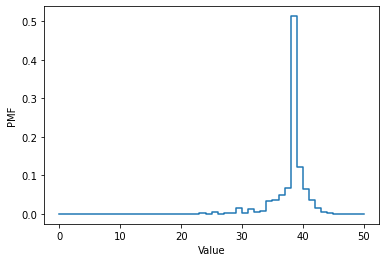

In [16]:
plt.step(list(pmf.keys()), list(pmf.values()))
plt.xlabel("Value")
plt.ylabel("PMF")
plt.show()
plt.close()

첫 아이와 다른 아이의 임신 기간 PMF를 그려서 비교해봅시다. 

In [17]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]
first_pmf = {key: val/len(firsts["prglngth"].dropna()) 
             for key, val in enumerate(np.bincount(firsts["prglngth"].dropna()))}
others_pmf = {key: val/len(others["prglngth"].dropna()) 
             for key, val in enumerate(np.bincount(others["prglngth"].dropna()))}

step과 bar를 비교해봅시다

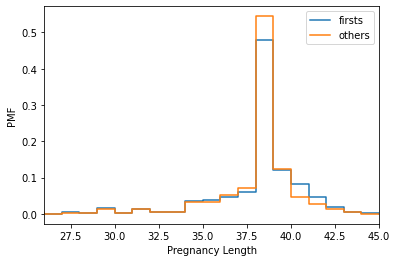

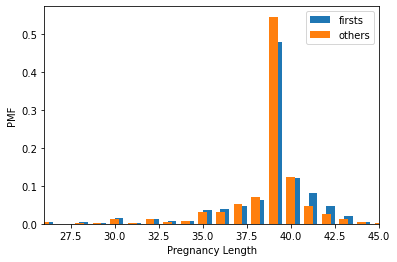

In [18]:
plt.step(list(first_pmf.keys()), list(first_pmf.values()), label="firsts")
plt.step(list(others_pmf.keys()), list(others_pmf.values()), label="others")
plt.xlabel("Pregnancy Length")
plt.ylabel("PMF")
plt.xlim(26, 45)
plt.legend()
plt.show()
plt.close()

plt.bar(list(first_pmf.keys()), list(first_pmf.values()), width=0.5, align="edge", label="firsts")
plt.bar(list(others_pmf.keys()), list(others_pmf.values()), width=0.5, align="center", label="others")
plt.xlabel("Pregnancy Length")
plt.ylabel("PMF")
plt.xlim(26, 45)
plt.legend()
plt.show()
plt.close()

두 확률이 얼마나 차이나는지 비교하는 코드를 구현해 봅시다.

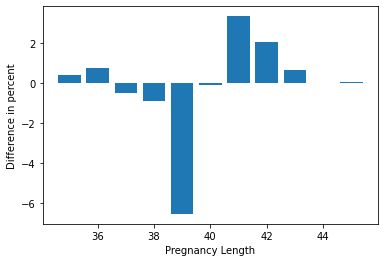

In [19]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf[week]
    p2 = others_pmf[week]
    diff = 100 * (p1 - p2)
    diffs.append(diff)

plt.bar(weeks, diffs)
plt.xlabel("Pregnancy Length")
plt.ylabel("Difference in percent")
plt.show()
plt.close()

## Cumulative Distribution Function
매주 하던대로 live, first, others를 구해봅시다


In [20]:
live = preg[preg.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

첫 아이와 다른 아이들의 무게에 대해서 분석해 봅시다.

1이 아닌 다른 사이즈의 bin을 쓰고 싶으면 np.histogram을 쓰면 됩니다.

In [21]:
first_wgt = firsts.totalwgt_lb
first_wgt_dropna = first_wgt.dropna()
print('Firsts', len(first_wgt), len(first_wgt_dropna))

other_wgt = others.totalwgt_lb
other_wgt_dropna = other_wgt.dropna()
print('Others', len(other_wgt), len(other_wgt_dropna))

first_hist, first_bins = np.histogram(first_wgt_dropna, bins=np.arange(0, 16, 0.05))
first_pmf = {key: val/len(first_wgt_dropna) 
             for key, val in zip(first_bins, first_hist)}
other_hist, other_bins = np.histogram(other_wgt_dropna, bins=np.arange(0, 16, 0.05))
other_pmf = {key: val/len(other_wgt_dropna) 
             for key, val in zip(other_bins, other_hist)}

Firsts 4413 4363
Others 4735 4675


하던대로 PMF를 그려서 비교해볼 수 있습니다만... 구분하기가 조금 힘듭니다.

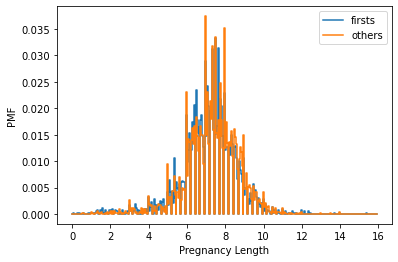

In [22]:
plt.step(list(first_pmf.keys()), list(first_pmf.values()), label="firsts")
plt.step(list(other_pmf.keys()), list(other_pmf.values()), label="others")
plt.xlabel("Pregnancy Length")
plt.ylabel("PMF")
plt.legend()
plt.show()
plt.close()

PercentileRank라는 함수를 만들어봅시다. PrecentileRank는 정렬된 값들중 이 값이 하위 몇%인지를 리턴해주는 함수입니다. 

In [23]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count += 1

    percentile_rank = 100.0 * count / len(scores)
    return percentile_rank

# t라는 score list를 가지고 테스트해 봅시다. 
t = [55, 66, 77, 88, 99]
PercentileRank(t, 88)
# 전체의 상위 80% 이므로 80이라는 값이 리턴됩니다.

80.0

Percentile이라는 함수는 반대로 Percentile Rank를 주면 그에 해당하는 값을 리턴해주는 함수입니다.

In [24]:
def Percentile(scores, percentile_rank):
    for score in sorted(scores):
        if PercentileRank(scores, score) >= percentile_rank:
            return score
        
# 테스트해봅시다.
Percentile(t, 45)

77

사실 위의 함수는 조금 느립니다. 정렬도 해야 하고... 조금 빠르게 만들어 봅시다. 

In [25]:
def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank * (len(scores)-1) // 100 # // 과 / 의 차이 기억하시죠? 소숫점 유무!
    return scores[index]
Percentile2(t, 45)

# 문제는 두 개의 작동이 약간 다르므로, 답이 다르게 나오는 것입니다 ^^: 

66

Cumulative Distribution Function (CDF)는 PercentileRank와 거의 같습니다. 차이는 0부터 100대신 0부터 1까지의 값을 주는 것 뿐입니다.

In [26]:
def evalCdf(sample, x):
    count = 0.0
    for value in sorted(sample):
        if value <= x:
            count += 1
    prob = count / len(sample)
    return prob

def getValCdf(sample, cdf_value):
    for score in sorted(sample):
        if evalCdf(sample, score) >= cdf_value:
            return score

def evalCdfCdf(cdf, target_val):
    for val, score in sorted(cdf.items()):
        if val >= target_val:
            return score
        
def getValCdfCdf(cdf, cdf_value):
    for val, score in sorted(cdf.items()):
        if score >= cdf_value:
            return val

위 함수를 통해서 CDF를 구해볼 수 있습니다. 

In [27]:
t = [1, 2, 2, 3, 5]
print(evalCdf(t, 0), evalCdf(t, 1), evalCdf(t, 2), evalCdf(t, 3), evalCdf(t, 4), evalCdf(t, 5))

0.0 0.2 0.6 0.8 0.8 1.0


사실 CDF는 이전까지 나오는 확률들의 합과 같습니다. pmf를 cdf로 변환하는 함수를 만들어봅시다.

In [28]:
def pmf2cdf(pmf_dict):
    cdf_dict = {}
    now = 0
    for k, v in sorted(pmf_dict.items()):
        now += v
        cdf_dict[k] = now
    return cdf_dict

In [29]:
live_wgt = live.totalwgt_lb
live_wgt_dropna = live_wgt.dropna()
live_hist, live_bins = np.histogram(live_wgt_dropna, bins=np.arange(0, 16, 0.05))
live_pmf = {key: val/len(live_wgt_dropna) 
             for key, val in zip(live_bins, live_hist)}
live_cdf = pmf2cdf(live_pmf)
first_cdf = pmf2cdf(first_pmf)
other_cdf = pmf2cdf(other_pmf)

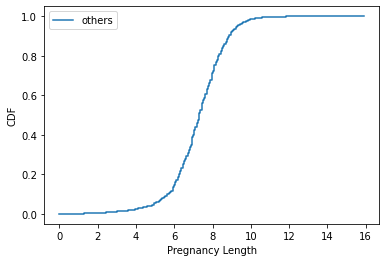

In [30]:
plt.step(list(other_cdf.keys()), list(other_cdf.values()), label="others")
plt.xlabel("Pregnancy Length")
plt.ylabel("CDF")
plt.legend()
plt.show()
plt.close()

median은 50 percentile, 그리고 0.5 CDF와 같습니다 

In [31]:
print(evalCdf(live_wgt_dropna, 8))
print(evalCdfCdf(live_cdf, 8))
getValCdfCdf(live_cdf, 0.5)

0.7332374419119274
0.7332374419119274


7.3500000000000005

두 그림의 차이를 위의 pmf보다 훨씬 명확하게 비교할 수 있습니다. 

pmf로 잘 안보이는 경우도 CDF로는 잘 보입니다. 

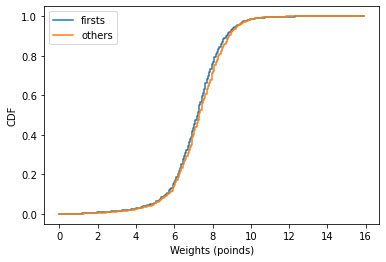

In [32]:
plt.step(list(first_cdf.keys()), list(first_cdf.values()), label="firsts")
plt.step(list(other_cdf.keys()), list(other_cdf.values()), label="others")
plt.xlabel("Weights (poinds)")
plt.ylabel("CDF")
plt.legend()
plt.show()
plt.close()

Interquartile range 는 25th percentile과 75th percentile 사이의 범위입니다.

In [33]:
iqr = (getValCdfCdf(live_cdf, 0.25), getValCdfCdf(live_cdf, 0.75))
iqr

(6.5, 8.1)

전체의 일부를 sample한 subset을 만들고, 이 set이 기존과 같은지 확인합시다

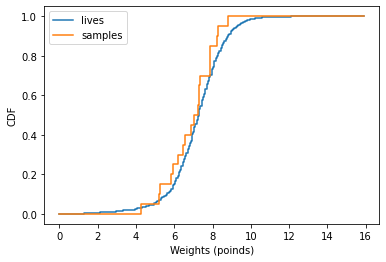

In [34]:
sample = np.random.choice(live_wgt_dropna, 20, replace=True) # SAMPLE SIZE를 바꾸어 가면서 확인해 봅시다
sample_hist, sample_bins = np.histogram(sample, bins=np.arange(0, 16, 0.05))
sample_pmf = {key: val/len(sample) 
             for key, val in zip(sample_bins, sample_hist)}
sample_cdf = pmf2cdf(sample_pmf)

plt.step(list(live_cdf.keys()), list(live_cdf.values()), label="lives")
plt.step(list(sample_cdf.keys()), list(sample_cdf.values()), label="samples")
plt.xlabel("Weights (poinds)")
plt.ylabel("CDF")
plt.legend()
plt.show()
plt.close()

## Pandas Indexing

Pandas의 index에 관해서 공부해봅시다.

In [35]:
array = np.random.randn(4, 2) # numpy 2d array가 리턴됩니다.
print(array.shape)
print(array)
df = pd.DataFrame(array)
df

(4, 2)
[[ 1.377287   -0.09533763]
 [ 1.07733851 -0.65191859]
 [ 1.02715394 -0.78302608]
 [ 0.07490247 -1.97440667]]


,0,1
0,1.377287,-0.095338
1,1.077339,-0.651919
2,1.027154,-0.783026
3,0.074902,-1.974407


column 이름은 columns를 통해 바꿀 수 있습니다

In [36]:
columns = ['A', 'B']
df = pd.DataFrame(array, columns=columns)
df

,A,B
0,1.377287,-0.095338
1,1.077339,-0.651919
2,1.027154,-0.783026
3,0.074902,-1.974407


index는 index로 바꿀 수 있습니다

In [37]:
index = ['a', 'b', 'c', 'd']
df = pd.DataFrame(array, columns=columns, index=index)
df

,A,B
a,1.377287,-0.095338
b,1.077339,-0.651919
c,1.027154,-0.783026
d,0.074902,-1.974407


일반적으로 dictionary 형태로 쓰게 되면 column 고르게 됩니다.

In [38]:
df['A']

a    1.377287
b    1.077339
c    1.027154
d    0.074902
Name: A, dtype: float64

row를 고르고 싶다면 ``loc``을 사용하면 됩니다

In [39]:
df.loc['a']

A    1.377287
B   -0.095338
Name: a, dtype: float64

row label은 모르는데 x번째 순서의 row를 고르고 싶다면 ``iloc``을 사용하면 됩니다

In [40]:
df.iloc[0]

A    1.377287
B   -0.095338
Name: a, dtype: float64

``loc``은 index의 리스트를 인자로 받을 수 있습니다. 여러 row를 고르고 싶다면 이렇게 하시면 됩니다

In [41]:
indices = ['a', 'c']
df.loc[indices]

,A,B
a,1.377287,-0.095338
c,1.027154,-0.783026


혹은 ``[:]``을 통해서 slice할 수 있습니다. 

In [42]:
df['a':'c']

,A,B
a,1.377287,-0.095338
b,1.077339,-0.651919
c,1.027154,-0.783026


In [43]:
df[0:2]

,A,B
a,1.377287,-0.095338
b,1.077339,-0.651919


위에서 integer로 ``[a:b]`` 를 하면 b가 포함이 되지 않고, index value로 할 경우 b가 포함이 되는 것에 유의하세요

## Exercises

**Exercise:** 첫 아이가 늦게 태어나는지에 대한 질문을 다시 한 번 해 봅시다. 지난 시간 까지는 어떤 산모에게 태어났든 평균적인 출산까지의 기간만을 계산했습니다. 하지만 개별 산모마다 기본적인 임신 기간의 차이가 있을 수도 있다는 사실을 무시했죠. 즉, 같은 산모가 두 아이를 낳은 경우에 첫 아기가 더 늦게 태어나는 경향이 있을 수도 있다는 것입니다. 

이 문제를 풀기 위해서, 2명 이상의 아이를 낳은 답변자들을 고려해 봅시다. 각 산모마다 첫 아이와 다른 아이의 임신 기간을 비교하고, 모든 산모의 평균을 내 봅시다. 이 경우에는 기존과 다른 결과가 나오나요? 그래프를 그려서 이해해봅시다

힌트: 3주차의 "preg_map"을 만드는 방법을 기억해보세요.

In [44]:
live = preg[preg.outcome == 1]
live = live[live.prglngth >= 37]

Mean difference between pairs 0.18850574712643678


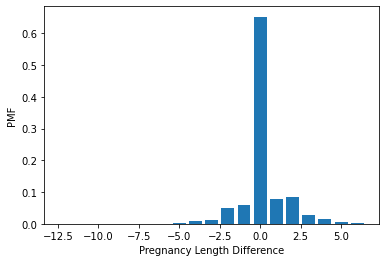

In [45]:
# Solution goes here
from collections import defaultdict

preg_map = defaultdict(list)
for index, caseid in live.caseid.iteritems():
    preg_map[caseid].append(index)
    # index는 전체에서의 임신 순서입니다.

diffs = []
for caseid, indices in preg_map.items():
    lengths = live.loc[indices].prglngth.values
    if len(lengths) >= 2:
        case_diffs = [lengths[0] - x for x in lengths[1:]]
        diffs.extend(case_diffs)

mean = np.mean(diffs)
print('Mean difference between pairs', mean)

live_hist, live_bins = np.histogram(diffs, bins=range(min(diffs), max(diffs)+2))
live_pmf = {key: val/len(diffs) for key, val in zip(live_bins, live_hist)}

plt.bar(list(live_pmf.keys()), list(live_pmf.values()))
plt.xlabel("Pregnancy Length Difference")
plt.ylabel("PMF")
plt.show()
plt.close()

**Exercise:** `numpy.random.random` 으로 만든 random number는 0과 1사이에 균일하게 분포해야 합니다. 즉, 모든 구간에서 균일한 확률로 존재해야 합니다.

`numpy.random.random`으로 1000개의 숫자를 만들어 봅시다. 

1) PMF를 그려봅시다. 무슨 문제가 있을까요?

2) CDF를 그려봅시다. 이 분포는 균일한가요?

3) random number의 생성 숫자를 바꾸어 가면서 테스트 해 봅시다. bin의 숫자도 바꾸어 봅시다. bin size, random number의 수, 보이는 분포의 균일성 관계를 생각해 봅시다

In [46]:
randnums = np.random.random(1000)

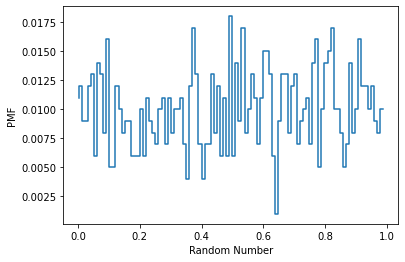

In [47]:
# Solution goes here
hist, bins = np.histogram(randnums, bins=100)
pmf = {key: val/len(randnums) for key, val in zip(bins, hist)}
plt.step(list(pmf.keys()), list(pmf.values()))
plt.xlabel("Random Number")
plt.ylabel("PMF")
plt.show()
plt.close()

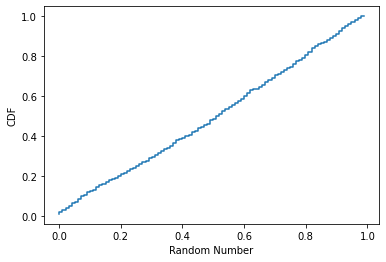

In [48]:
# Solution goes here
cdf = pmf2cdf(pmf)
hist, bins = np.histogram(randnums, bins=100)
plt.step(list(cdf.keys()), list(cdf.values()))
plt.xlabel("Random Number")
plt.ylabel("CDF")
plt.show()
plt.close()